In [ ]:
import tensorflow as tf 

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

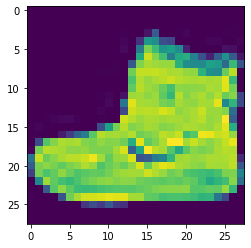

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
#plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

train_images = train_images / 255.0

train_validated_images = train_images[:int(len(train_images)*0.7)]
train_validated_labels = train_labels[:int(len(train_images)*0.7)]

val_images = train_images[int(len(train_images)*0.7):]
val_labels = train_labels[int(len(train_images)*0.7):]

test_images = test_images / 255.0

input_layer = Input(shape=(28,28))
flat_layer = Flatten(input_shape=(28, 28))(input_layer)
dense_4 = Dense(100,activation="relu")(flat_layer)
output = Dense(10, activation="softmax")(dense_4)

model = Model(input_layer, output)
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

model.compile(optimizer="adam",
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=["accuracy"])
model.fit(x=train_validated_images, y=train_validated_labels,validation_data=(val_images, val_labels), batch_size=32, epochs=100, callbacks=[early_stopping])



Epoch 1/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.6957 - accuracy: 0.4939 - val_loss: 0.8225 - val_accuracy: 0.7244
Epoch 2/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7702 - accuracy: 0.7347 - val_loss: 0.6639 - val_accuracy: 0.7606
Epoch 3/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6451 - accuracy: 0.7676 - val_loss: 0.6047 - val_accuracy: 0.7828
Epoch 4/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5816 - accuracy: 0.7902 - val_loss: 0.5662 - val_accuracy: 0.7987
Epoch 5/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5531 - accuracy: 0.8042 - val_loss: 0.5374 - val_accuracy: 0.8079
Epoch 6/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5297 - accuracy: 0.8147 - val_loss: 0.5165 - val_accuracy: 0.8142
Epoch 7/100
1313/1313 [==============================] - 5s 3ms/step - loss: 0.5105 - accuracy: 0.8200 - val_loss: 0.5021 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
predictions = model.predict(test_images)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
import numpy as np

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

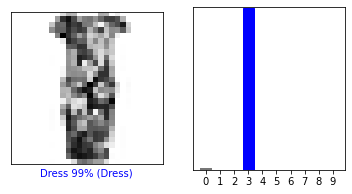

In [ ]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()